 # Linear Regression
  Approximates data points with the help of a linear function.

## Approximation
  $$yp = w.x + b$$

## Cost Function
   $$MSE = J(w,b) = \frac{1}{N} \sum_{i=1}^{n} (y_i - (w x_i + b))^2$$

\begin{split}\begin{align}
J'(m,b) =
  \begin{bmatrix}
    \frac{dJ}{dm}\\
    \frac{dJ}{db}\\
  \end{bmatrix}
&=
  \begin{bmatrix}
    \frac{1}{N} \sum -x_i \cdot 2(y_i - (mx_i + b)) \\
    \frac{1}{N} \sum -1 \cdot 2(y_i - (mx_i + b)) \\
  \end{bmatrix}\\
&=
  \begin{bmatrix}
     \frac{1}{N} \sum -2x_i(y_i - (mx_i + b)) \\
     \frac{1}{N} \sum -2(y_i - (mx_i + b)) \\
  \end{bmatrix}
\end{align}\end{split}
   

## Gradient Descent
[<img src="http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" width="550"/>](http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png)

## Update Rules
  $$w = w - lr.dw$$
  $$b = b - lr.db$$

## Learning Rate
  [<img src = "https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png" width="750"/>](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)



In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path = '/media/anmol/Study/GITHUB/Workshop_NIT_Meghalaya/Datasets/melbourne_housing/melb_data.csv'

In [50]:
data = pd.read_csv(path)
data.shape

(13580, 21)

In [25]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [26]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [27]:
#identify object type columns
print(data.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [28]:
obj = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea','Regionname','Postcode']
for i in obj:
    data[i] = data[i].astype('category')
data['Date'] = pd.to_datetime(data['Date'])

In [29]:
data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [30]:
data = data.drop(['Bedroom2'],1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
Suburb           13580 non-null category
Address          13580 non-null category
Rooms            13580 non-null int64
Type             13580 non-null category
Price            13580 non-null float64
Method           13580 non-null category
SellerG          13580 non-null category
Date             13580 non-null datetime64[ns]
Distance         13580 non-null float64
Postcode         13580 non-null category
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null category
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null category
Propertycount    13580 non-null float64
dtypes: category(8), datetime64[ns](1), float64(10), int64(1)
memory usage: 2.2 

In [32]:
data['Age'] = 2017 - data['YearBuilt']

data['Historic'] = np.where(data['Age']>=50, 'Historic','Contemporary')

data['Historic'] = data['Historic'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 22 columns):
Suburb           13580 non-null category
Address          13580 non-null category
Rooms            13580 non-null int64
Type             13580 non-null category
Price            13580 non-null float64
Method           13580 non-null category
SellerG          13580 non-null category
Date             13580 non-null datetime64[ns]
Distance         13580 non-null float64
Postcode         13580 non-null category
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null category
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null category
Propertycount    13580 non-null float64
Age              8205 non-null float64
Historic         13580 non-null category


In [33]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Age              5375
Historic            0
dtype: int64

In [34]:
data = data.dropna()
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Age              0
Historic         0
dtype: int64

In [35]:
data = data[data['BuildingArea']!=0]
data.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Age
count,6195.000000,6.195000e+03,6195.00000,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000,6195.000000
mean,2.931558,1.068865e+06,9.75230,1.576433,1.573688,471.048265,141.591497,1964.076190,-37.807906,144.990209,7435.588701,52.923810
std,0.971085,6.752047e+05,5.61172,0.711382,0.929993,897.516427,90.824342,38.106016,0.075856,0.099171,4338.042029,38.106016
min,1.000000,1.310000e+05,0.00000,1.000000,0.000000,0.000000,1.000000,1196.000000,-38.164920,144.542370,389.000000,-1.000000
25%,2.000000,6.200000e+05,5.90000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855455,144.926195,4382.500000,17.000000
50%,3.000000,8.800000e+05,9.00000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802300,144.995800,6567.000000,47.000000
75%,4.000000,1.325000e+06,12.40000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000,77.000000
max,8.000000,9.000000e+06,47.40000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000,821.000000


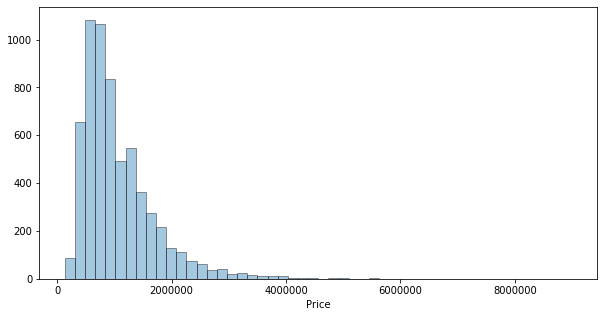

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(data['Price'],kde=False,hist_kws=dict(edgecolor="k"))

Text(0.5, 1, 'Melbourne Correlation')

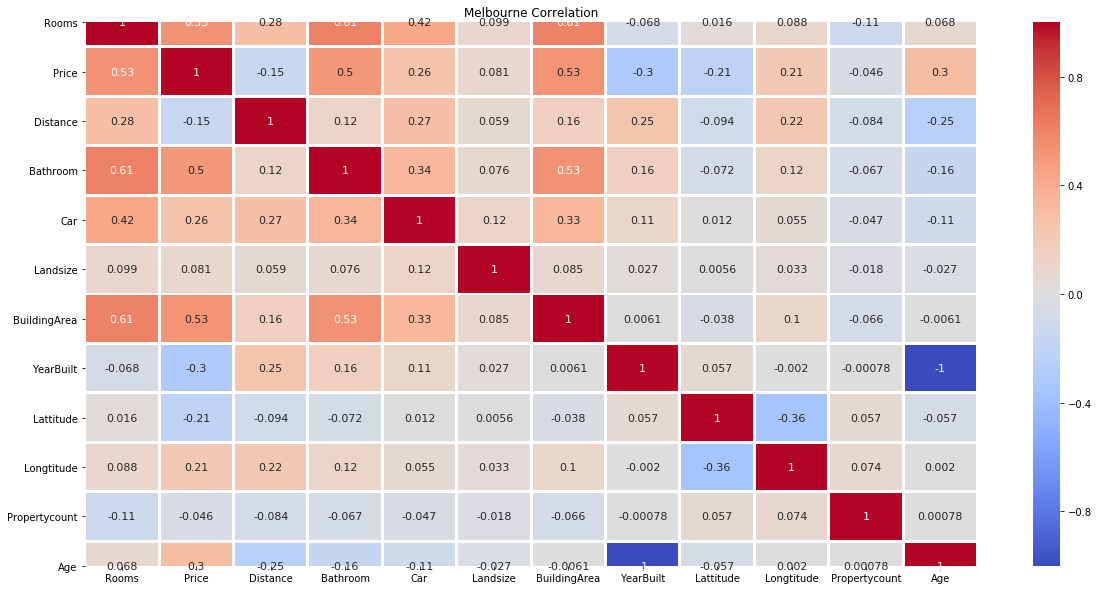

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap = 'coolwarm', linewidth = 2,annot = True, annot_kws = {"size":11})
plt.title('Melbourne Correlation')

In [38]:
data.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [39]:
X = data[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age']]

Y = data['Price']

In [40]:
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [41]:
print("XTrain SHAPE: ",XTrain.shape)
print("XTest SHAPE: ",XTest.shape)
print("YTrain SHAPE: ",YTrain.shape)
print("YTest SHAPE: ",YTest.shape)
YTrain = YTrain.values.reshape(4956,1)
YTest = YTest.values.reshape(1239,1)
print("--------------")
print("YTrain SHAPE: ",YTrain.shape)
print("YTest SHAPE: ",YTest.shape)

XTrain SHAPE:  (4956, 8)
XTest SHAPE:  (1239, 8)
YTrain SHAPE:  (4956,)
YTest SHAPE:  (1239,)
--------------
YTrain SHAPE:  (4956, 1)
YTest SHAPE:  (1239, 1)


In [42]:
from sklearn.linear_model import LinearRegression

teacher = LinearRegression()

learner = teacher.fit(XTrain,YTrain)
print('Coefficients: ', learner.coef_)
print('Intercept: ', learner.intercept_)

Coefficients:  [[ 1.20110914e+05 -2.79262428e+04  2.40457780e+05  5.47137258e+04
   2.88958067e+01  2.58158303e+03  3.47491847e-01  5.31550186e+03]]
Intercept:  [-141160.7057536]


In [43]:
YPred = teacher.predict(XTest)

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

print('Mean Absolute Error:',mean_absolute_error(YTest,YPred))
print('Mean Squared Error:',mean_squared_error(YTest,YPred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(YTest,YPred)))
print('R-Squared ERROR:',explained_variance_score(YTest,YPred))

Mean Absolute Error: 304513.14409011067
Mean Squared Error: 258001327045.26794
Root Mean Squared Error: 507938.3102752419
R-Squared ERROR: 0.4726907890319173


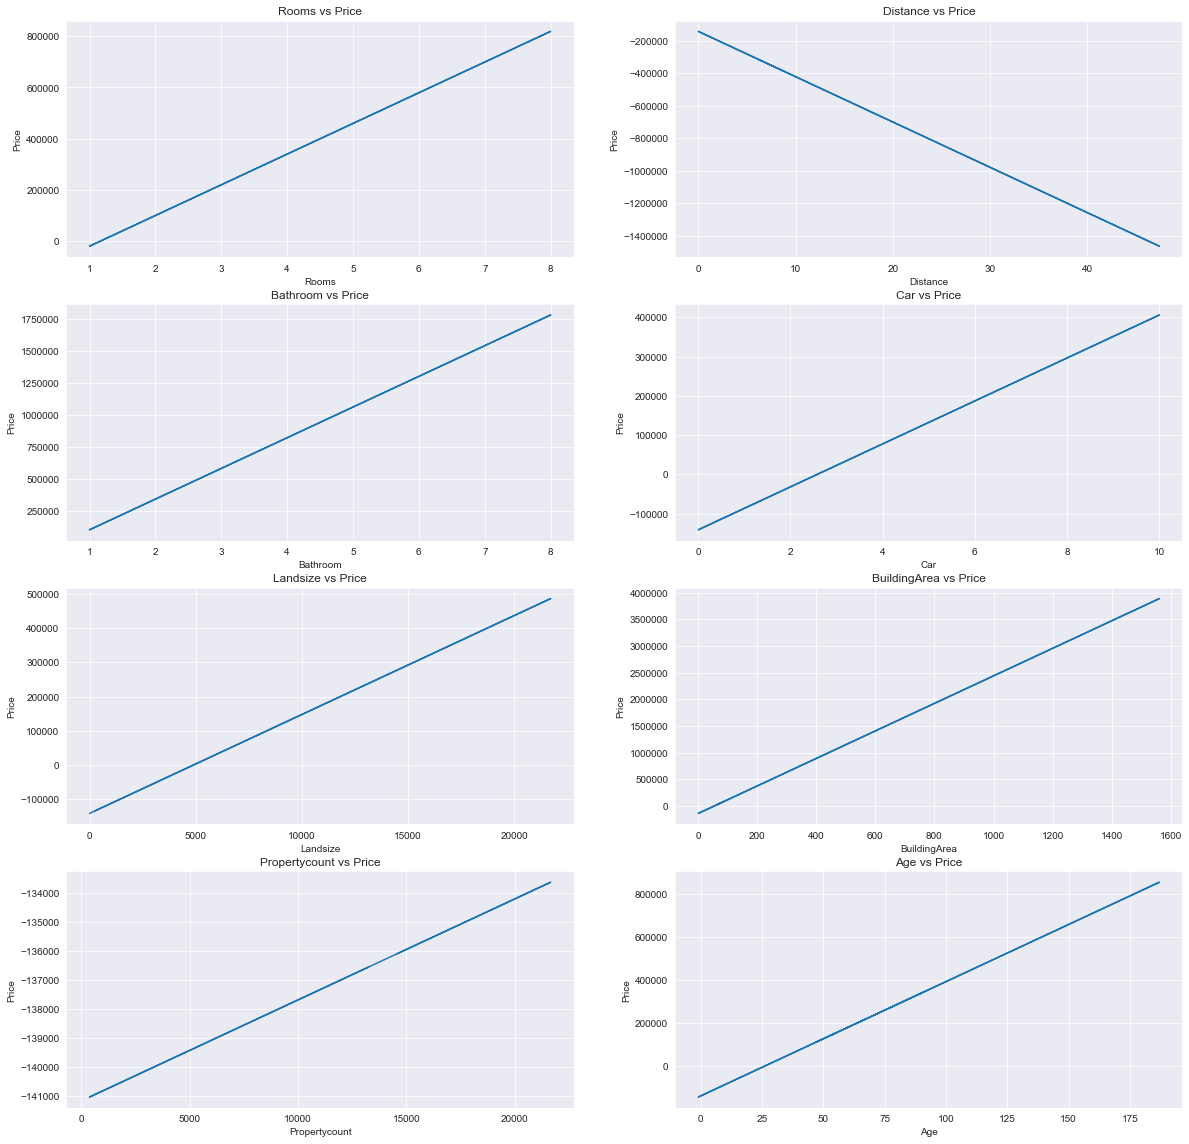

In [45]:
sns.set_style('darkgrid')
f,axes = plt.subplots(4,2,figsize=(20,20))

#Rooms vs Price
axes[0,0].plot(XTrain['Rooms'], learner.coef_[0][0]*XTrain['Rooms'] + learner.intercept_[0])
axes[0,0].set_title('Rooms vs Price')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')

#Distance vs Price
axes[0,1].plot(XTrain['Distance'], learner.coef_[0][1]*XTrain['Distance'] + learner.intercept_[0])
axes[0,1].set_title('Distance vs Price')
axes[0,1].set_xlabel('Distance')
axes[0,1].set_ylabel('Price')

#Bathroom vs Price
axes[1,0].plot(XTrain['Bathroom'], learner.coef_[0][2]*XTrain['Bathroom'] + learner.intercept_[0])
axes[1,0].set_title('Bathroom vs Price')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')

#Car vs Price
axes[1,1].plot(XTrain['Car'], learner.coef_[0][3]*XTrain['Car'] + learner.intercept_[0])
axes[1,1].set_title('Car vs Price')
axes[1,1].set_xlabel('Car')
axes[1,1].set_ylabel('Price')

#Landsize vs Price
axes[2,0].plot(XTrain['Landsize'], learner.coef_[0][4]*XTrain['Landsize'] + learner.intercept_[0])
axes[2,0].set_title('Landsize vs Price')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')

#BuildingArea vs Price
#axes[2,1].scatter(XTrain['BuildingArea'],YTrain)
axes[2,1].plot(XTrain['BuildingArea'], learner.coef_[0][5]*XTrain['BuildingArea'] + learner.intercept_[0])
axes[2,1].set_title('BuildingArea vs Price')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('Price')

#Propertycount vs Price
axes[3,0].plot(XTrain['Propertycount'], learner.coef_[0][6]*XTrain['Propertycount'] + learner.intercept_[0])
axes[3,0].set_title('Propertycount vs Price')
axes[3,0].set_xlabel('Propertycount')
axes[3,0].set_ylabel('Price')

#Age vs Price
axes[3,1].plot(XTrain['Age'], learner.coef_[0][7]*XTrain['Age'] + learner.intercept_[0])
axes[3,1].set_title('Age vs Price')
axes[3,1].set_xlabel('Age')
axes[3,1].set_ylabel('Price')

plt.show()

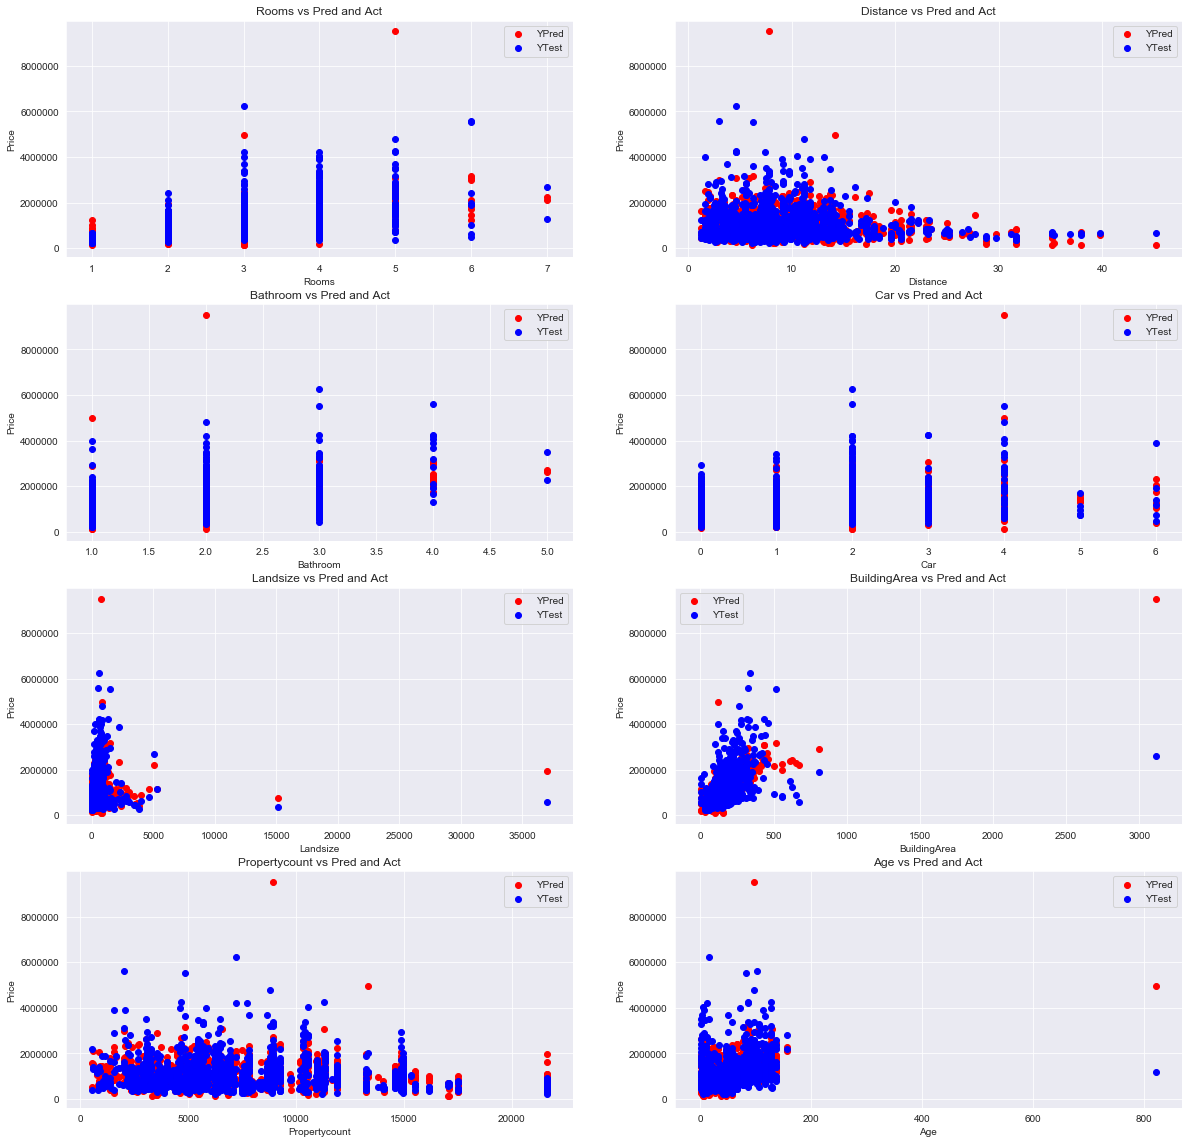

In [46]:
sns.set_style('darkgrid')
f,axes = plt.subplots(4,2,figsize=(20,20))

#Rooms vs YPred vs YTest
axes[0,0].scatter(XTest['Rooms'],YPred,color = 'red')
axes[0,0].scatter(XTest['Rooms'],YTest,color = 'blue')
axes[0,0].set_title('Rooms vs Pred and Act')
axes[0,0].legend(["YPred","YTest"])
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')

#Distance vs YPred vs YTest
axes[0,1].scatter(XTest['Distance'],YPred,color = 'red')
axes[0,1].scatter(XTest['Distance'],YTest,color = 'blue')
axes[0,1].set_title('Distance vs Pred and Act')
axes[0,1].legend(["YPred","YTest"])
axes[0,1].set_xlabel('Distance')
axes[0,1].set_ylabel('Price')

#Bathroom vs YPred vs YTest
axes[1,0].scatter(XTest['Bathroom'],YPred,color = 'red')
axes[1,0].scatter(XTest['Bathroom'],YTest,color = 'blue')
axes[1,0].set_title('Bathroom vs Pred and Act')
axes[1,0].legend(["YPred","YTest"])
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')

#Car vsYPred vs YTest
axes[1,1].scatter(XTest['Car'],YPred,color = 'red')
axes[1,1].scatter(XTest['Car'],YTest,color = 'blue')
axes[1,1].set_title('Car vs Pred and Act')
axes[1,1].legend(["YPred","YTest"])
axes[1,1].set_xlabel('Car')
axes[1,1].set_ylabel('Price')

#Landsize vs YPred vs YTest
axes[2,0].scatter(XTest['Landsize'],YPred,color = 'red')
axes[2,0].scatter(XTest['Landsize'],YTest,color = 'blue')
axes[2,0].set_title('Landsize vs Pred and Act')
axes[2,0].legend(["YPred","YTest"])
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')

#BuildingArea vs YPred vs YTest
axes[2,1].scatter(XTest['BuildingArea'],YPred,color = 'red')
axes[2,1].scatter(XTest['BuildingArea'],YTest,color = 'blue')
axes[2,1].set_title('BuildingArea vs Pred and Act')
axes[2,1].legend(["YPred","YTest"])
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('Price')

#Propertycount vs YPred vs YTest
axes[3,0].scatter(XTest['Propertycount'],YPred,color = 'red')
axes[3,0].scatter(XTest['Propertycount'],YTest,color = 'blue')
axes[3,0].set_title('Propertycount vs Pred and Act')
axes[3,0].legend(["YPred","YTest"])
axes[3,0].set_xlabel('Propertycount')
axes[3,0].set_ylabel('Price')

#Age vs YPred vs YTest
axes[3,1].scatter(XTest['Age'],YPred,color = 'red')
axes[3,1].scatter(XTest['Age'],YTest,color = 'blue')
axes[3,1].set_title('Age vs Pred and Act')
axes[3,1].legend(["YPred","YTest"])
axes[3,1].set_xlabel('Age')
axes[3,1].set_ylabel('Price')

plt.show()

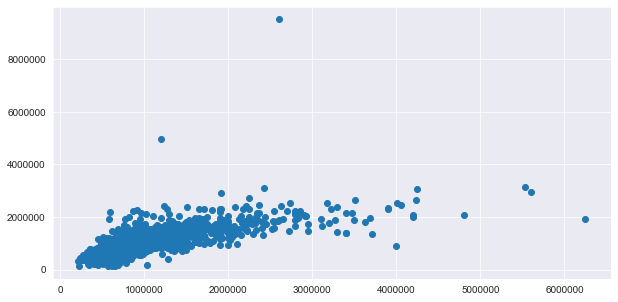

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(YTest,YPred)
plt.show()

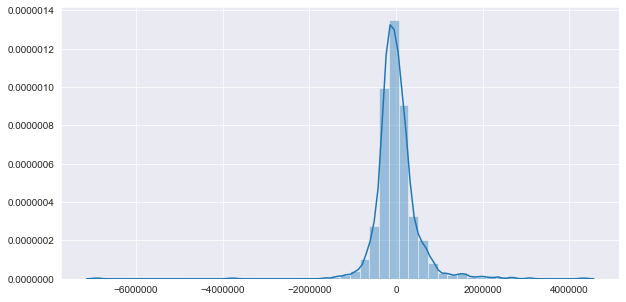

In [48]:
plt.figure(figsize=(10,5))
sns.distplot((YTest-YPred))